This notebook performs exploratory data analysis (EDA). The EDA begins with an overview of the dataset, then looks at the distribution of individual features, then compares features to the target, and ends by considering various combinations of features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
#import the dataset from GitHub
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/final_df.csv'
df = pd.read_csv(url)

In [3]:
#convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#convert Store, Dept, and Type columns to category
df['Store'] = df['Store'].astype('category')

df['Dept'] = df['Dept'].astype('category')

df['Type'] = df['Type'].astype('category')

In [4]:
#get basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418660 entries, 0 to 418659
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418660 non-null  category      
 1   Date          418660 non-null  datetime64[ns]
 2   Temperature   418660 non-null  float64       
 3   Fuel_Price    418660 non-null  float64       
 4   MarkDown1     418660 non-null  float64       
 5   MarkDown2     418660 non-null  float64       
 6   MarkDown3     418660 non-null  float64       
 7   MarkDown4     418660 non-null  float64       
 8   MarkDown5     418660 non-null  float64       
 9   CPI           418660 non-null  float64       
 10  Unemployment  418660 non-null  float64       
 11  IsHoliday     418660 non-null  bool          
 12  Dept          418660 non-null  category      
 13  Type          418660 non-null  category      
 14  Size          418660 non-null  int64         
 15  Weekly_Sales  418

In [5]:
#get overall summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,418660.0,60.062170,18.440017,5.540,46.660000,62.070000,74.250000,100.140000
Fuel_Price,418660.0,3.359362,0.458406,2.472,2.931000,3.452000,3.735000,4.468000
MarkDown1,418660.0,2576.223052,6057.124707,0.000,0.000000,0.000000,2753.900000,88646.760000
MarkDown2,418660.0,882.194699,5086.067782,0.000,0.000000,0.000000,2.630000,104519.540000
MarkDown3,418660.0,470.476286,5544.253468,0.000,0.000000,0.000000,4.360000,141630.610000
MarkDown4,418660.0,1080.257751,3901.845590,0.000,0.000000,0.000000,415.360000,67474.850000
MarkDown5,418660.0,1654.635434,4207.488142,0.000,0.000000,0.000000,2146.940000,108519.280000
CPI,418660.0,171.198834,39.161102,126.064,132.022667,182.350989,212.416993,227.232807
Unemployment,418660.0,7.961422,1.864432,3.879,6.891000,7.866000,8.567000,14.313000
Size,418660.0,136695.373260,61009.540432,34875.000,93638.000000,140167.000000,202505.000000,219622.000000


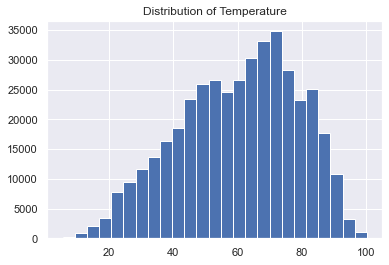

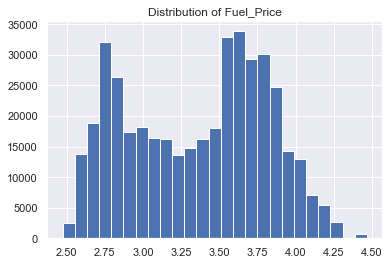

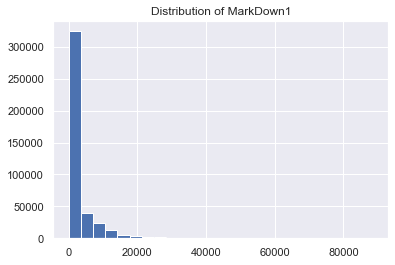

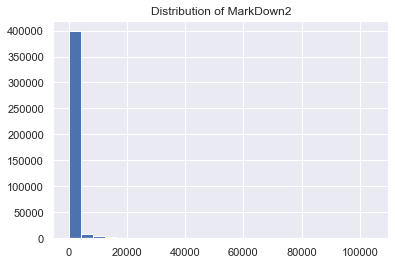

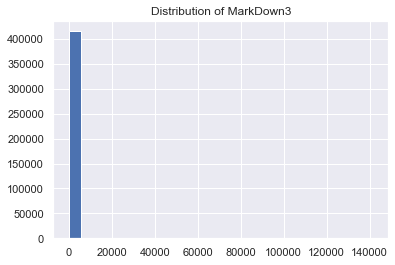

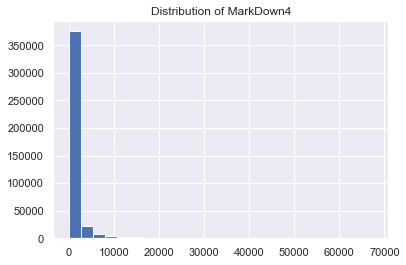

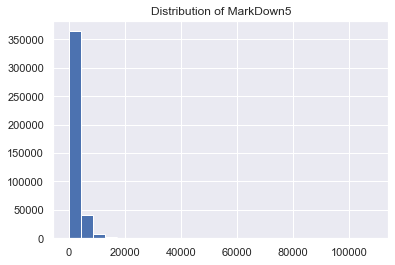

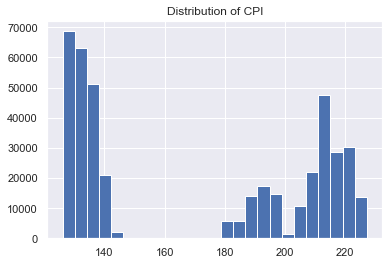

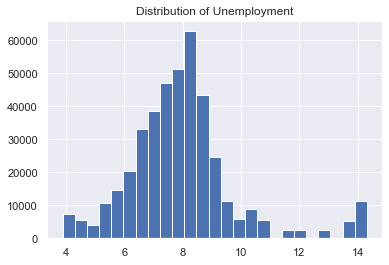

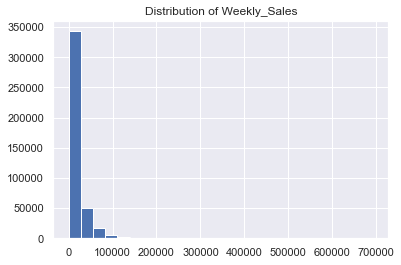

In [150]:
#plot histograms of the continuous variables
sns.set()

numeric_columns = [x for x in df.columns if df.dtypes[x] in ['float', 'int']]

for var in numeric_columns:
    fig, ax = plt.subplots()
    ax.hist(df[var], bins=25)
    ax.set_title(f'Distribution of {var}')

Text(0.5, 0, 'Total Sales in Millions')

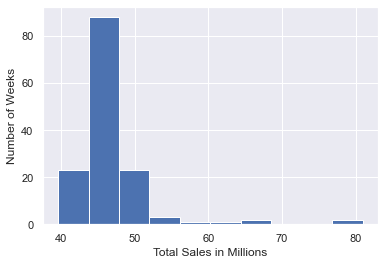

In [151]:
#histogram of total sales (across all stores and departments)
df.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='hist')
plt.ylabel('Number of Weeks')
plt.xticks(ticks=[40000000, 50000000, 60000000, 70000000, 80000000], labels=[40, 50, 60, 70, 80])
plt.xlabel('Total Sales in Millions')

In [152]:
print('The average store deparment does {:.2f} in sales per week, with a standard deviation of {:.2f}'.format(df.Weekly_Sales.mean(), df.Weekly_Sales.std()))

The average store deparment does 16027.10 in sales per week, with a standard deviation of 22726.51


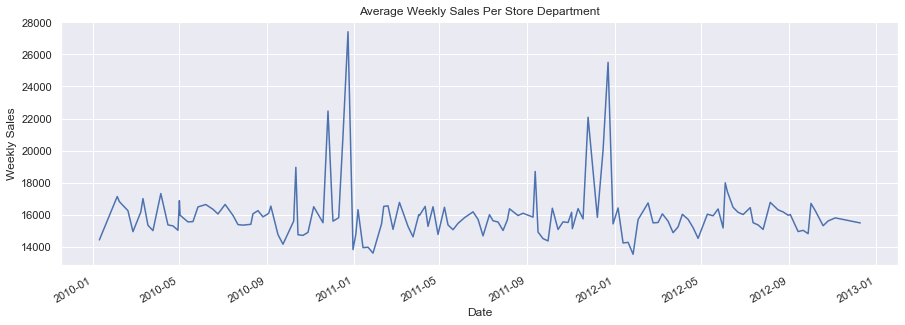

In [153]:
#plot the average sales per week per store department
average_sales_per_week_per_department = df.groupby('Date')['Weekly_Sales'].mean()


fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_ylabel('Weekly Sales')
_ = ax.set_title('Average Weekly Sales Per Store Department')
_ = average_sales_per_week_per_department.plot()


In [154]:
#get total sales per week across all stores
total_sales_per_week = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
total_sales_per_week

,Date,Weekly_Sales
0,2010-01-10,42240037.61
1,2010-02-04,50424232.22
2,2010-02-07,48917953.47
3,2010-02-19,48277902.33
4,2010-02-26,43970440.65
...,...,...
138,2012-10-08,46865112.71
139,2012-10-19,45122443.96
140,2012-10-26,44985905.93
141,2012-11-05,45571387.91


In [155]:
print('The company does an average of {:.2f} in sales, across all stores'.format(total_sales_per_week['Weekly_Sales'].mean()))

The company does an average of 46922424.17 in sales, across all stores


In [156]:
#get average store sales per week
average_store_sales_per_week = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()
average_store_sales_per_week.head(10)

,Date,Store,Weekly_Sales
0,2010-01-10,1,1453329.50
1,2010-01-10,2,1827440.43
2,2010-01-10,3,358784.10
3,2010-01-10,4,1842821.02
4,2010-01-10,5,283178.12
5,2010-01-10,6,1328468.89
6,2010-01-10,7,448998.73
7,2010-01-10,8,804105.49
8,2010-01-10,9,495692.19
9,2010-01-10,10,1645892.97


The average store does 1046624.03 in sales per week


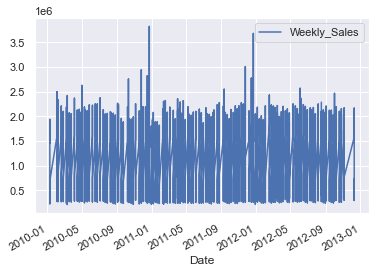

In [157]:
average_store_sales_per_week.plot(x='Date', y='Weekly_Sales')
print('The average store does {:.2f} in sales per week'.format(average_store_sales_per_week['Weekly_Sales'].mean()))

In [158]:
#compare the min, median, and max store
grouped_by_store = df.groupby('Store')['Weekly_Sales'].mean()

for idx, sales in grouped_by_store.iteritems():
    if sales == grouped_by_store.min():
        print(idx, sales)
    elif sales==grouped_by_store.max():
        print(idx, sales)
    elif sales==grouped_by_store.median():
        print(idx, sales)

5 5063.583124789767
20 29621.063178624434
35 13991.406228981508


In [159]:
min_max_median_store = df[df['Store'].isin([5, 20, 45])].groupby(['Date', 'Store'])['Weekly_Sales'].sum().dropna().reset_index()
min_max_median_store

,Date,Store,Weekly_Sales
0,2010-01-10,5,283178.12
1,2010-01-10,20,1933719.21
2,2010-01-10,45,690007.76
3,2010-02-04,5,331406.00
4,2010-02-04,20,2405395.22
...,...,...,...
422,2012-11-05,20,2168097.11
423,2012-11-05,45,770487.37
424,2012-12-10,5,325345.41
425,2012-12-10,20,2162996.18


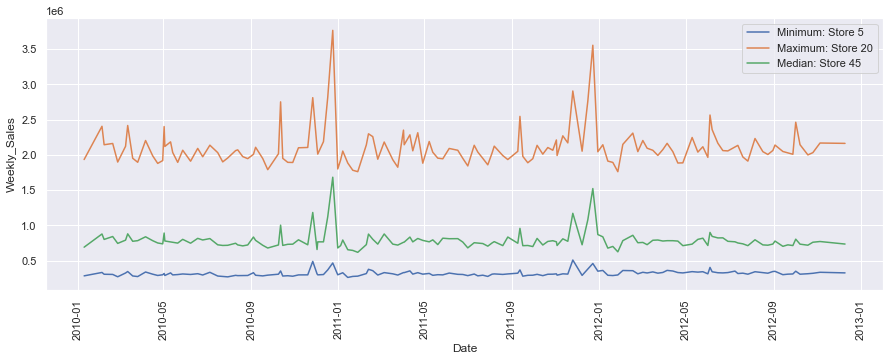

In [160]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=min_max_median_store)
_ = plt.xticks(rotation='90')
_ = plt.legend(['Minimum: Store 5', 'Maximum: Store 20', 'Median: Store 45'])

Date
2010-01-10    14426.242353
2010-02-04    17133.616113
2010-02-07    16816.072008
2010-02-19    16249.714685
2010-02-26    14940.686595
Name: Weekly_Sales, dtype: float64


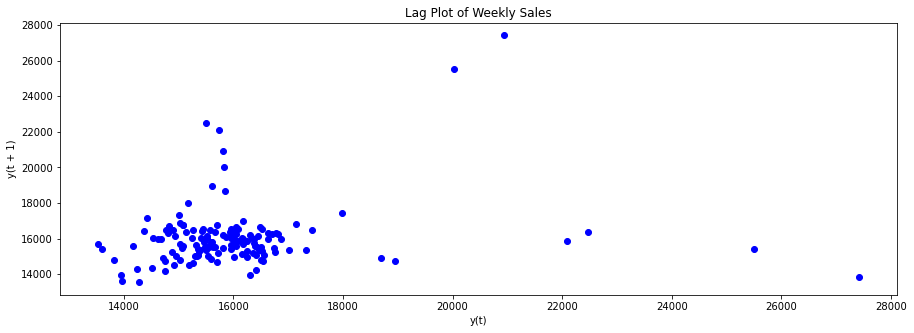

In [6]:
#create a time series lag scatter plot
df_indexed = df.set_index('Date')
time_series = df_indexed.groupby(df_indexed.index)['Weekly_Sales'].mean()
print(time_series.head())

from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(15, 5))
_ = lag_plot(time_series, lag=1, ax=ax, c='blue')
_ = ax.set_title('Lag Plot of Weekly Sales')

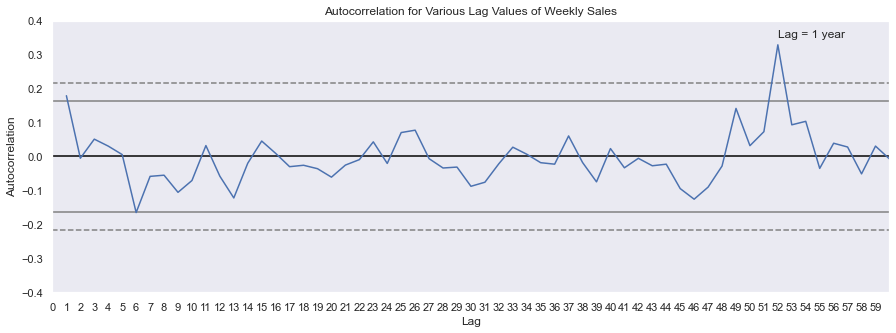

In [162]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(time_series, ax=ax)
_ = plt.xlim(0, 60)
_ = plt.ylim(-.4, .4)
_ = plt.xticks(range(0, 60, 1))
_ = plt.title('Autocorrelation for Various Lag Values of Weekly Sales')
_ = plt.annotate('Lag = 1 year', xy=(52, .35))

The peak correlation occurs between the value of Weekly Sales at t, and its value at t-52 (i.e. the same week last year).
There is also some correlation between t and t-1 and negative correlation between t and t-6.

In [163]:
#get frequency counts for the categorical variables

#get the number of rows for each store
df['Store'].value_counts().sort_values(ascending=False).rename('Number of Rows For Each Store')

13    10459
1     10229
2     10216
27    10198
4     10196
6     10190
32    10171
24    10140
34    10135
10    10124
20    10105
19    10048
11    10034
28    10028
23    10018
40    10003
31     9963
14     9938
41     9913
8      9884
26     9846
17     9815
18     9807
39     9772
25     9771
15     9718
7      9673
22     9647
45     9613
12     9600
21     9546
29     9424
16     9338
35     9337
3      9027
5      8919
9      8712
38     7353
37     7198
44     7143
30     7140
42     6909
43     6730
33     6479
36     6151
Name: Number of Rows For Each Store, dtype: int64

In [164]:
#get the number of rows for each department
df['Dept'].value_counts().sort_values(ascending=False).rename('Number of Rows for Each Department')

1     6411
82    6411
40    6411
3     6411
95    6411
      ... 
78     202
65     142
77     132
39      16
43      12
Name: Number of Rows for Each Department, Length: 81, dtype: int64

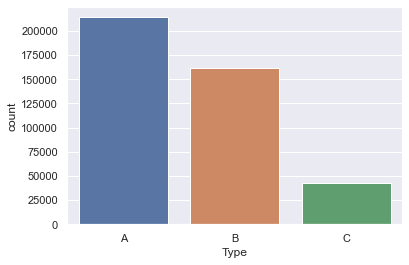

In [165]:
#plot the number of rows for each tyoe
_ = sns.countplot(x='Type', data=df)

In [166]:
#get the range of the dates
print('Earliest date: {}'.format(df['Date'].min()))
print('Latest date: {}'.format(df['Date'].max()))

delta = df['Date'].max() - df['Date'].min()
print('Range: {}'.format(delta))

Earliest date: 2010-01-10 00:00:00
Latest date: 2012-12-10 00:00:00
Range: 1065 days 00:00:00


In [167]:
#calculate the total sales and sales each year
print('Total sales: {:.2f}'.format(df['Weekly_Sales'].sum()))
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'sum'}))

Total sales: 6709906656.94


,Weekly_Sales
Date,
2010,2.288919e+09
2011,2.447362e+09
2012,1.973625e+09


In [168]:
#calculate the average weekly sales each year
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'mean'}))

,Weekly_Sales
Date,
2010,16315.740243
2011,16010.796236
2012,15724.345441


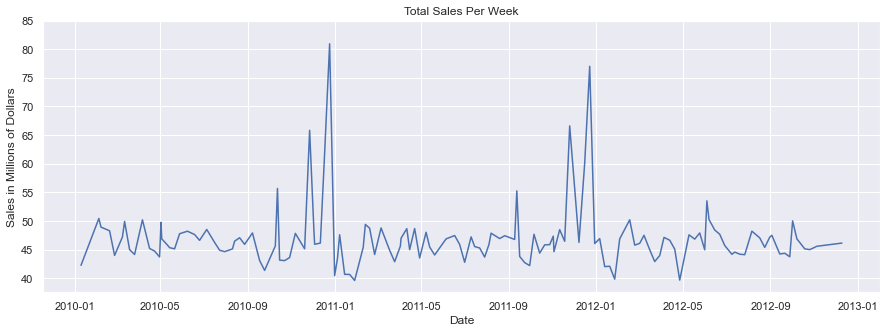

In [169]:
#plot the weekly sales

sales_per_week = df.groupby(df.Date).agg({'Weekly_Sales':'sum'})

sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_week.index, sales_per_week['Weekly_Sales'] / (10**6))
_ = ax.set_title('Total Sales Per Week')
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 90.0, 5.0))

In [170]:
df_indexed = df.set_index('Date')
df_indexed.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,Weekly_Sales
Date,,,,,,,,,,,,,,,
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,A,151315,24924.50
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,A,151315,50605.27
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,A,151315,13740.12
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,A,151315,39954.04
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,A,151315,32229.38


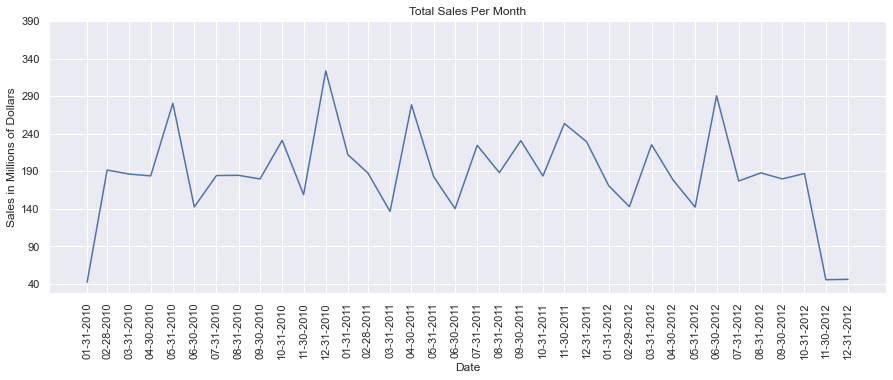

In [171]:
sales_per_month = df_indexed.resample('M')['Weekly_Sales'].sum()

fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_month / (10**6))
_ = ax.set_title('Total Sales Per Month')
_ = ax.set_xticks(list(sales_per_month.index))
_ = ax.set_xticklabels(sales_per_month.index.strftime('%m-%d-%Y'), rotation=90)
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 400.0, 50.0))

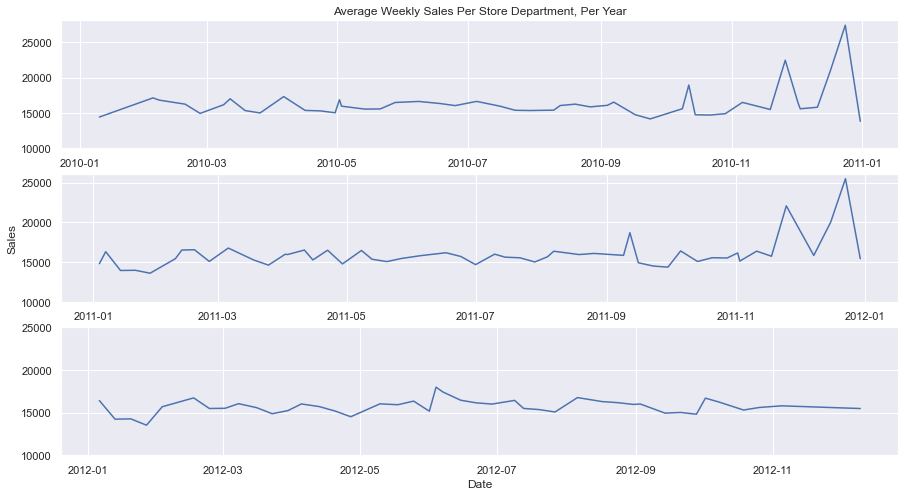

In [172]:
#plot weekly sales for each year
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
_ = ax[0].plot(df_indexed['2010'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[1].plot(df_indexed['2011'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[2].plot(df_indexed['2012'].groupby('Date')['Weekly_Sales'].mean())

_ = ax[0].set_yticks([10000, 15000, 20000, 25000])
_ = ax[1].set_yticks([10000, 15000, 20000, 25000])
_ = ax[2].set_yticks([10000, 15000, 20000, 25000])

_ = ax[0].set_title("Average Weekly Sales Per Store Department, Per Year")
_ = ax[1].set_ylabel("Sales")
_ = ax[2].set_xlabel("Date")

In [174]:
#what months had the highest average weekly sales 
df_indexed.groupby(df_indexed.index.strftime('%B'))['Weekly_Sales'].mean().sort_values(ascending=False).reset_index().rename(columns={'Date':'Month', 'Weekly_Sales':'Average Weekly Sales'})

,Month,Average Weekly Sales
0,December,18407.920336
1,November,17319.973953
2,June,16326.196003
3,August,16068.865207
4,February,16060.143982
5,May,15905.225110
6,October,15795.630317
7,April,15679.636122
8,March,15621.330888
9,July,15577.083610


December had the highest average weekly sales. Average weekly sales are used since each month does not contain the same representation (number of weeks) in the dataset.

In [175]:
#what weeks had the highest sales
df_indexed.groupby(df_indexed.index)['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().rename(columns={'Date':'Week', 'Weekly_Sales':'Total Sales'})

,Week,Total Sales
0,2010-12-24,80931586.20
1,2011-12-23,76999773.57
2,2011-11-25,66593835.85
3,2010-11-26,65821216.26
4,2010-12-17,61821317.85
...,...,...
138,2011-01-21,40654860.31
139,2010-12-31,40434740.42
140,2012-01-27,39835117.15
141,2012-04-27,39663063.65


Weeks that contain holidays such as Christmas and Thanksgiving (followed by black friday) are in the top 5, while the 5 lowest weeks occur in the month after Christmas. We can explore this further using the IsHoliday column:

In [176]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15945.776382
True     17108.099010
Name: Weekly_Sales, dtype: float64

Roughly 1,000 more units are sold on holiday weeks on average than on non-holiday weeks

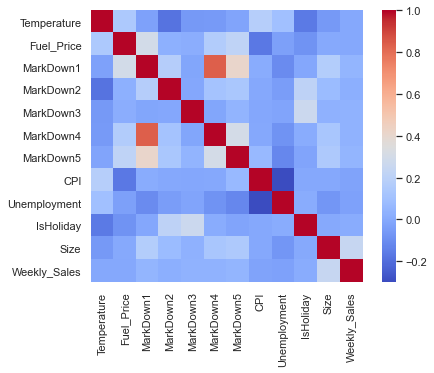

In [177]:
#plot a heatmap of correlations between each variable
fix, ax = plt.subplots(figsize=(7, 5))
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm', ax=ax)

In [178]:
#check if any variables have a linear correlation to Weekly_Sales
df.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.244181
MarkDown5       0.050280
MarkDown1       0.046957
MarkDown3       0.038618
MarkDown4       0.037461
MarkDown2       0.021028
IsHoliday       0.013047
Fuel_Price     -0.000326
Temperature    -0.002578
CPI            -0.020970
Unemployment   -0.025877
Name: Weekly_Sales, dtype: float64

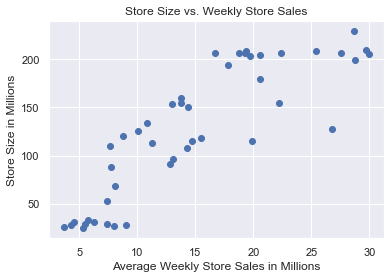

In [179]:
#do larger stores sell more units?
store_and_size = df.groupby('Store')[['Weekly_Sales', 'Size']].sum()
store_and_size = store_and_size.reset_index()
_ = plt.scatter(store_and_size['Weekly_Sales'] * 10**-7, store_and_size['Size'] * 10**-7)
_ = plt.xlabel('Average Weekly Store Sales in Millions')
_ = plt.ylabel('Store Size in Millions')
_ = plt.title('Store Size vs. Weekly Store Sales')

In [180]:
df['Size_Category'] = pd.cut(df['Size'], bins=[0, 100000, 200000, np.inf], labels=['Small', 'Medium', 'Large'])
df.groupby('Size_Category')['Weekly_Sales'].mean()

Size_Category
Small      8609.299795
Medium    15280.112107
Large     23293.034223
Name: Weekly_Sales, dtype: float64

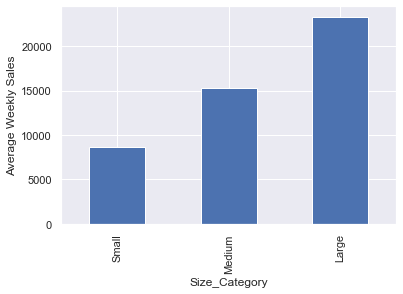

In [181]:
df.groupby('Size_Category')['Weekly_Sales'].mean().plot(kind='bar')
_ = plt.ylabel('Average Weekly Sales')

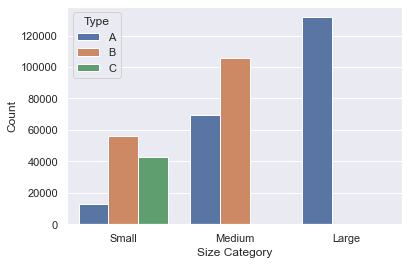

In [182]:
#is there a correlation between store size and type?
_ = sns.countplot(x='Size_Category', hue='Type', data=df)
_ = plt.xlabel("Size Category")
_ = plt.ylabel("Count")

In [183]:
#Which departments had the highest weekly sales on average
df.groupby('Dept').agg({'Weekly_Sales':'mean'}).sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Dept,
92,75196.072706
95,69801.864406
38,61079.385082
72,50849.394926
65,45377.903592
...,...
45,23.782797
51,22.680490
39,11.123750


In [184]:
#combine stores and departments into a single variable
df['Store_Dept'] = df['Store'].astype('str') + '-' + df['Dept'].astype('str')

In [185]:
#which store departments had the highest average weekly sales
df.groupby('Store_Dept').agg({'Weekly_Sales':'mean', 'Store_Dept':'count'}).sort_values(by='Weekly_Sales', ascending=False).rename(columns={'Store_Dept':'Count'})

,Weekly_Sales,Count
Store_Dept,,
14-92,182847.957324,142
2-92,164840.230979,143
20-92,164539.312042,142
13-92,162034.099301,143
4-92,159339.862606,142
...,...,...
28-43,0.750000,2
14-43,0.250000,1
33-99,0.022000,5


In [37]:
df_indexed.loc[df_indexed.index.year==2010, :].groupby('df_indexed.index.month')

KeyError: 'df_indexed.index.month'